In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/train.csv', ',',index_col=0)
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### calculate log of fares

In [3]:
df['Fare log'] = df['Fare'].apply(np.log).round(2)  # works with any function
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare log
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.98
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.27


### convert gender to a Boolean

In [4]:
df['Sex1'] = df['Sex'].replace(['female','male'], [True,False])
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare log,Sex1
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.98,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.27,True


### combine species and gender into one column

In [5]:
df['SexAge'] = df['Sex'] + df['Age'].astype(str)
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare log,Sex1,SexAge
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.98,False,male22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.27,True,female38.0


### Imputation

replace empty values by non-empty values

In [6]:
df.isna().head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare log,Sex1,SexAge
PassengerId,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [7]:
df.fillna(method='bfill').head(2) # zero, mean, random, median, backfill/forwardfill/interpolation (time series) 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare log,Sex1,SexAge
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,1.98,False,male22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.27,True,female38.0


In [8]:
df.fillna(method='ffill').head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare log,Sex1,SexAge
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.98,False,male22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.27,True,female38.0


In [9]:
df.fillna(0).head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare log,Sex1,SexAge
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1.98,False,male22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.27,True,female38.0


In [10]:
df.interpolate(method='linear').head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare log,Sex1,SexAge
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.98,False,male22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.27,True,female38.0


### Binning

*reduces the amount of information: scalar -> category*

In [11]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Age']

PassengerId
1      22.000000
2      38.000000
3      26.000000
4      35.000000
5      35.000000
         ...    
887    27.000000
888    19.000000
889    29.699118
890    26.000000
891    32.000000
Name: Age, Length: 891, dtype: float64

In [12]:
pd.cut(df['Age'], bins=[0.0, 18.0, 35.0, 55.0, 120.0])

PassengerId
1      (18.0, 35.0]
2      (35.0, 55.0]
3      (18.0, 35.0]
4      (18.0, 35.0]
5      (18.0, 35.0]
           ...     
887    (18.0, 35.0]
888    (18.0, 35.0]
889    (18.0, 35.0]
890    (18.0, 35.0]
891    (18.0, 35.0]
Name: Age, Length: 891, dtype: category
Categories (4, interval[float64]): [(0.0, 18.0] < (18.0, 35.0] < (35.0, 55.0] < (55.0, 120.0]]

In [13]:
df['Age_category'] = pd.cut(x=df['Age'], bins=[0.0, 18.0, 35.0, 55.0, 120.0], labels=[1, 2, 3, 4])

df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare log,Sex1,SexAge,Age_category
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.98,False,male22.0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.27,True,female38.0,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.07,True,female26.0,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.97,True,female35.0,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.09,False,male35.0,2


In [14]:
df.loc[df['Sex'] == 'male', 'Sex'] = 1
df.loc[df['Sex'] == 'female', 'Sex'] = 0
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare log,Sex1,SexAge,Age_category
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,1.98,False,male22.0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,4.27,True,female38.0,3
3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,2.07,True,female26.0,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,3.97,True,female35.0,2
5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,2.09,False,male35.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S,2.56,False,male27.0,2
888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,3.40,True,female19.0,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3.15,True,femalenan,2


### Scaling

In [15]:
age_range = df['Age'].max() - df['Age'].min()
age_range

79.58

*features being on different scales is usually bad for the model*

In [16]:
 (df['Age'] - df['Age'].min() ) / age_range

PassengerId
1      0.271174
2      0.472229
3      0.321438
4      0.434531
5      0.434531
         ...   
887    0.334004
888    0.233476
889    0.367921
890    0.321438
891    0.396833
Name: Age, Length: 891, dtype: float64

### Scaling with Scikit

In [17]:
from sklearn.preprocessing import MinMaxScaler
df['Age']

PassengerId
1      22.000000
2      38.000000
3      26.000000
4      35.000000
5      35.000000
         ...    
887    27.000000
888    19.000000
889    29.699118
890    26.000000
891    32.000000
Name: Age, Length: 891, dtype: float64

In [18]:
scaler = MinMaxScaler()
scaler.fit(df['Age'].values.reshape(-1,1))  # memorizes the min and max for each column; no y  

MinMaxScaler()

In [19]:
Xscaled = scaler.transform(df['Fare'].values.reshape(-1,1))

scaler.fit(df['Fare'].values.reshape(-1,1))

Xtrans = scaler.transform(df['Fare'].values.reshape(-1,1))
print("data after:\n", Xtrans[:5])

data after:
 [[0.01415106]
 [0.13913574]
 [0.01546857]
 [0.1036443 ]
 [0.01571255]]


### Logistic regression

In [20]:
X = df[['Pclass','Age_category','Sex']]

y = df['Survived']

In [21]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression(C=1e5) #training the model
m.fit(X, y)  
 
acc=m.score(X,y) 

print(f"{acc.round(3) * 100}% accuracy") 

78.8% accuracy


In [22]:
m.coef_

array([[-1.15293553, -0.56221546, -2.60486185]])

In [23]:
m.intercept_

array([4.90050763])

In [24]:
m.predict_proba(X)

array([[0.90784417, 0.09215583],
       [0.11295305, 0.88704695],
       [0.42134119, 0.57865881],
       ...,
       [0.42134119, 0.57865881],
       [0.4954303 , 0.5045697 ],
       [0.90784417, 0.09215583]])

In [25]:
#making prediction
import numpy as np
Pclass=1
Age_category=2
Sex=1

Xnew=np.array([[Pclass, Age_category, Sex]])

In [26]:
m.predict(Xnew)

array([1])

In [27]:
m.predict_proba(Xnew)

array([[0.4954303, 0.5045697]])

In [28]:
#saving the model
import pickle
pickle.dump(m, open('log_regression.m', 'wb'))

In [29]:
#loading the model
m2=pickle.load(open('log_regression.m','rb'))
m2.predict(Xnew)

array([1])

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
df['pred1']=1
accuracy_score(y, df['pred1'])

0.3838383838383838

In [32]:
precision_score(y, df['pred1'])  # only works with numbers 1,0

0.3838383838383838

In [33]:
recall_score(y, df['pred1'])  # only works with numbers 1,0

1.0

In [34]:
f1_score(y, df['pred1'])  # only works with numbers 1,0

0.5547445255474452

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, df['pred1'])

array([[  0, 549],
       [  0, 342]])

In [36]:
from sklearn.model_selection import train_test_split  #splitting train and split 
from sklearn.metrics import roc_auc_score, roc_curve
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [38]:
m = LogisticRegression(C=1e5)

In [39]:
m.fit(X_train, y_train) #training logregression

LogisticRegression(C=100000.0)

In [40]:
probabilities = m.predict_proba(X_test)

In [41]:
probs = probabilities[:,1]

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, probs) #false positive rate, true positive rate

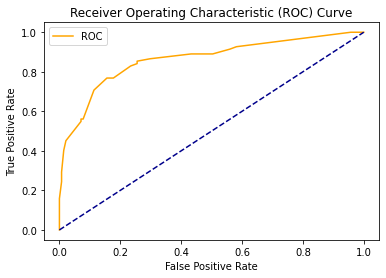

In [43]:
plot_roc_curve(fpr, tpr) #plotting ROC